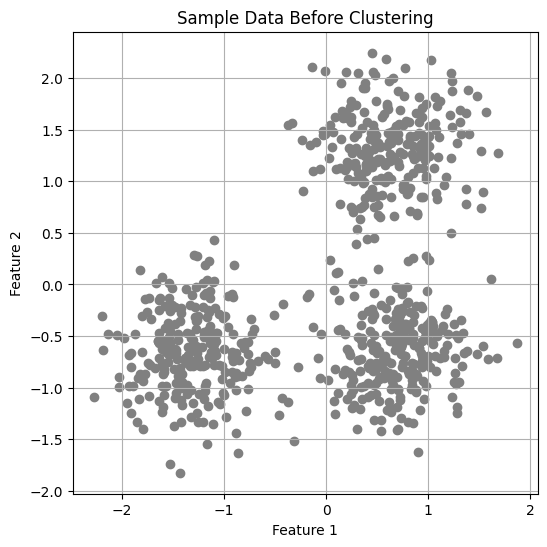

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)



# Plotting before clustering
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], color='gray', marker='o')
plt.title('Sample Data Before Clustering')
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


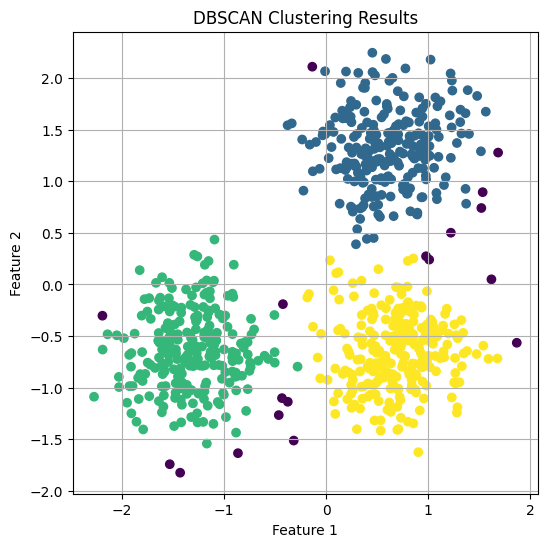

In [12]:
def scratch_dbscan(data, eps, min_samples):
    n_points = len(data)
    labels = np.full(n_points, -1)  # Start with all points labeled as noise (-1)
    core_points = np.zeros(n_points, dtype=bool)  # Identify core points

    # Step 1: Identify core points
    for i in range(n_points):
        distances = np.linalg.norm(data - data[i], axis=1)
        neighbors = np.where(distances <= eps)[0]
        if len(neighbors) >= min_samples:
            core_points[i] = True

    cluster_id = 0
    visited = np.zeros(n_points, dtype=bool)  # Track visited points

    # Step 2: Expand clusters
    for i in range(n_points):
        if core_points[i] and not visited[i]:
            labels[i] = cluster_id
            visited[i] = True
            queue = [i]
            while queue:
                current_point = queue.pop(0)
                distances = np.linalg.norm(data - data[current_point], axis=1)
                neighbors = np.where(distances <= eps)[0]
                if len(neighbors) >= min_samples:
                    for neighbor in neighbors:
                        if not visited[neighbor]:
                            visited[neighbor] = True
                            queue.append(neighbor)
                            labels[neighbor] = cluster_id
            cluster_id += 1

    # Step 3: Handle border points (optional; already handled if clusters are assigned in the loop)
    return labels


# Apply the scratch implementation of DBSCAN
my_labels = scratch_dbscan(X, eps=0.3, min_samples=10)

# Plotting the clustering results
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
